In [9]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [55]:
import seaborn as sns

In [153]:
from scipy.stats import gaussian_kde, norm

In [7]:
%ls *.csv

 Volume in drive E is RAFAEL01
 Volume Serial Number is 14FB-1CF6

 Directory of e:\repositories\lectures\simulation\random-variables

10/08/2024  11:57 AM             1,350 311-caller-wait-time-pm-2-16-1.csv
10/08/2024  12:08 PM           757,709 england-nhs-aande.csv
10/08/2024  12:07 PM             1,885 job-center-wait-time-1.csv
10/08/2024  12:18 PM            40,655 queue_data.csv
               4 File(s)        801,599 bytes
               0 Dir(s)  55,562,141,696 bytes free


In [10]:
data = pd.read_csv('queue_data.csv')
data.head()

,arrival_time,start_time,finish_time,wait_time,queue_length
0,30-03-2023 0.10,30-03-2023 0.10,2023-03-30 00:22:44.800000000,12.68,28
1,30-03-2023 0.10,30-03-2023 0.16,2023-03-30 00:25:53.200000000,9.82,28
2,30-03-2023 0.10,30-03-2023 0.16,2023-03-30 00:25:48.400000000,9.74,28
3,30-03-2023 0.10,30-03-2023 0.14,2023-03-30 00:27:23.200000000,13.32,28
4,30-03-2023 0.10,30-03-2023 0.15,2023-03-30 00:31:21.400000000,16.29,28


In [11]:
data.tail()

,arrival_time,start_time,finish_time,wait_time,queue_length
555,30-03-2023 22.00,30-03-2023 22.02,2023-03-30 22:16:59.800000000,14.83,12
556,30-03-2023 22.00,30-03-2023 22.10,2023-03-30 22:13:56.200000000,3.77,12
557,30-03-2023 22.00,30-03-2023 22.00,2023-03-30 22:05:35.799999999,5.43,12
558,30-03-2023 23.54,30-03-2023 23.54,2023-03-31 00:00:42.400000000,5.74,2
559,30-03-2023 23.54,30-03-2023 23.58,2023-03-31 00:17:23.200000000,18.42,2


In [16]:
arrival_time = data['arrival_time'].str.split(expand=True)[1].unique()

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   arrival_time  560 non-null    object 
 1   start_time    560 non-null    object 
 2   finish_time   560 non-null    object 
 3   wait_time     560 non-null    float64
 4   queue_length  560 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 22.0+ KB


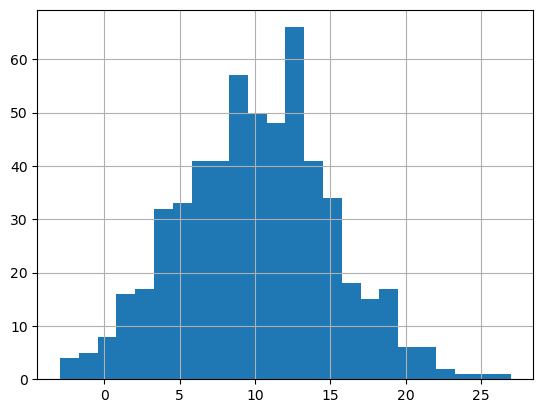

In [44]:
data['wait_time'].hist(bins=24)
plt.show()

24
25
560
24
[ 2.85175269  4.94085345  8.05114517 12.33897021 17.78548639 24.11116249
 30.74228369 36.86546147 41.57849794 44.10455962 44.00112259 41.28664528
 36.43518743 30.24112843 23.6069864  17.33199998 11.9680221   7.77251659
  4.74751675  2.7273252   1.47357729  0.74881491  0.35788346  0.16086973]


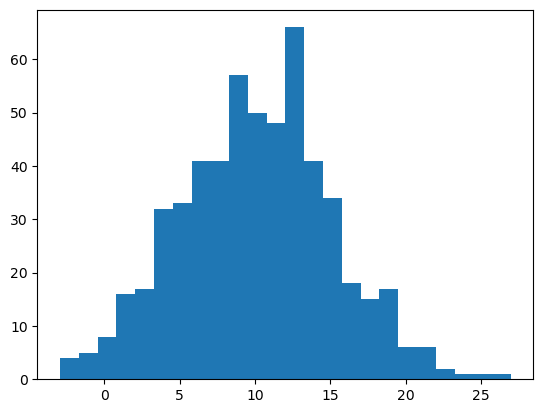

In [196]:
values, bins01, _ = plt.hist(
    data['wait_time'],
    bins=24,
    # density=True
)

pdf01 = norm.pdf(
    # (bins01[1:] + bins01[:-1]) / 2,
    bins01[1:],
    loc=data['wait_time'].mean(),
    scale=data['wait_time'].std(),
)

# print(values)
print(values.size)
print(bins01.size)
print(data['wait_time'].size)

# print(pdf01)
expected = pdf01 * data['wait_time'].size
# print(values)
print(expected.size)
print(expected)

In [197]:

from scipy.stats import chisquare
# Frecuencias observadas y esperadas (ejemplo con 4 bins)


chi2_stat, p_value = chisquare(values, f_exp=expected)
print("Estadístico Chi-cuadrado:", chi2_stat, "P-value:", p_value)

ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
0.25495885426581527

In [21]:
data['wait_time'].describe()

count    560.000000
mean      10.107911
std        5.032406
min       -2.930000
25%        6.527500
50%       10.120000
75%       13.322500
max       26.980000
Name: wait_time, dtype: float64

In [26]:
negs_mask = data['wait_time'] < 0
print(data.loc[negs_mask, 'wait_time'].size )

13


In [31]:
negs_mask.value_counts(normalize=True).round(2)

False    0.98
True     0.02
Name: wait_time, dtype: float64

In [165]:
data.loc[~negs_mask, 'wait_time'].value_counts(bins=23).sort_index()

(0.312, 1.498]      12
(1.498, 2.657]      17
(2.657, 3.815]      20
(3.815, 4.973]      27
(4.973, 6.131]      35
(6.131, 7.29]       38
(7.29, 8.448]       42
(8.448, 9.606]      52
(9.606, 10.764]     48
(10.764, 11.923]    44
(11.923, 13.081]    62
(13.081, 14.239]    41
(14.239, 15.397]    34
(15.397, 16.556]    19
(16.556, 17.714]    18
(17.714, 18.872]    16
(18.872, 20.03]     10
(20.03, 21.189]      4
(21.189, 22.347]     4
(22.347, 23.505]     1
(23.505, 24.663]     2
(24.663, 25.822]     0
(25.822, 26.98]      1
Name: wait_time, dtype: int64

In [166]:
data.loc[~negs_mask, 'wait_time'].describe()

count    547.000000
mean      10.377806
std        4.771044
min        0.340000
25%        6.845000
50%       10.360000
75%       13.420000
max       26.980000
Name: wait_time, dtype: float64

In [41]:
print(np.sqrt(560 - 13))

23.388031127053


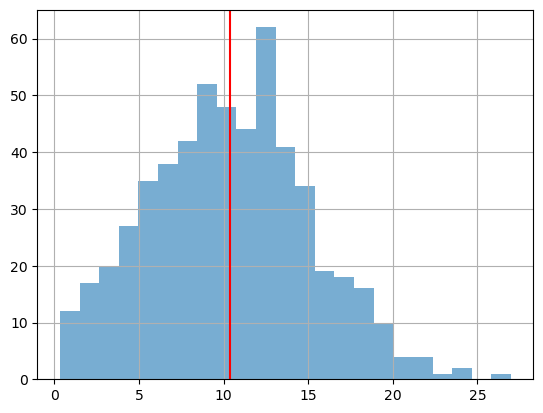

In [107]:
# data['wait_time'].hist(bins=24)
data.loc[~negs_mask, 'wait_time'].hist(bins=23, alpha=0.60)
plt.axvline(data.loc[~negs_mask, 'wait_time'].mean(), color="red")
plt.show()

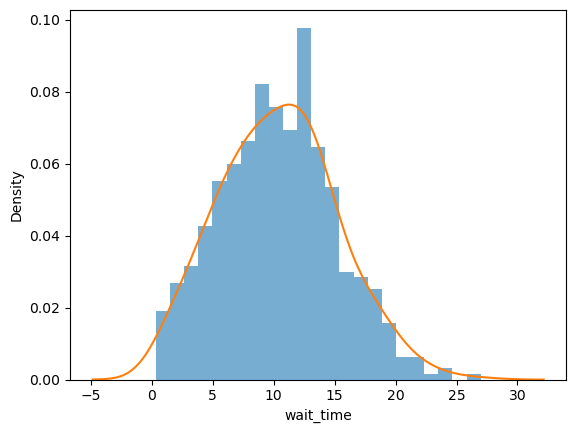

In [160]:
(values, bins, _)= plt.hist(
    data.loc[~negs_mask, 'wait_time'],
    bins=23, 
    alpha=0.60, 
    density=True
    )

sns.kdeplot(
    data=data.loc[~negs_mask, 'wait_time'],
    bw_adjust=1.276,
)
plt.show()

In [161]:
bins

array([ 0.34      ,  1.49826087,  2.65652174,  3.81478261,  4.97304348,
        6.13130435,  7.28956522,  8.44782609,  9.60608696, 10.76434783,
       11.9226087 , 13.08086957, 14.23913043, 15.3973913 , 16.55565217,
       17.71391304, 18.87217391, 20.03043478, 21.18869565, 22.34695652,
       23.50521739, 24.66347826, 25.82173913, 26.98      ])

In [163]:
bins.size

24

In [167]:
bins[1:]

array([ 1.49826087,  2.65652174,  3.81478261,  4.97304348,  6.13130435,
        7.28956522,  8.44782609,  9.60608696, 10.76434783, 11.9226087 ,
       13.08086957, 14.23913043, 15.3973913 , 16.55565217, 17.71391304,
       18.87217391, 20.03043478, 21.18869565, 22.34695652, 23.50521739,
       24.66347826, 25.82173913, 26.98      ])

In [168]:
bins[:-1]

array([ 0.34      ,  1.49826087,  2.65652174,  3.81478261,  4.97304348,
        6.13130435,  7.28956522,  8.44782609,  9.60608696, 10.76434783,
       11.9226087 , 13.08086957, 14.23913043, 15.3973913 , 16.55565217,
       17.71391304, 18.87217391, 20.03043478, 21.18869565, 22.34695652,
       23.50521739, 24.66347826, 25.82173913])

In [151]:
bin_centers = (bins[:-1] + bins[1:]) / 2
bin_centers

array([ 0.91913043,  2.0773913 ,  3.23565217,  4.39391304,  5.55217391,
        6.71043478,  7.86869565,  9.02695652, 10.18521739, 11.34347826,
       12.50173913, 13.66      , 14.81826087, 15.97652174, 17.13478261,
       18.29304348, 19.45130435, 20.60956522, 21.76782609, 22.92608696,
       24.08434783, 25.2426087 , 26.40086957])

In [169]:
bin_centers.size

23

In [154]:
pdf = norm.pdf(
    bin_centers,
    loc=data.loc[~negs_mask, 'wait_time'].mean(),
    scale=data.loc[~negs_mask, 'wait_time'].std(),
    )

In [155]:
pdf

array([0.01171728, 0.01840992, 0.02726975, 0.03808154, 0.05013626,
       0.0622291 , 0.07281807, 0.08033207, 0.0835493 , 0.08192205,
       0.07572912, 0.06599775, 0.05422498, 0.04200238, 0.03067273,
       0.02111714, 0.01370635, 0.00838712, 0.00483846, 0.00263152,
       0.0013493 , 0.00065225, 0.00029725])

In [172]:
pdf2 = norm.pdf(
    bins[1:],
    loc=data.loc[~negs_mask, 'wait_time'].mean(),
    scale=data.loc[~negs_mask, 'wait_time'].std(),
    )

pdf2

array([0.01479581, 0.02257179, 0.03246365, 0.04401824, 0.05626939,
       0.06781345, 0.07704839, 0.08253067, 0.08334342, 0.07934716,
       0.07121894, 0.06026481, 0.04807686, 0.03615868, 0.02563853,
       0.0171387 , 0.01080107, 0.00641741, 0.00359465, 0.00189827,
       0.00094507, 0.00044358, 0.00019628])

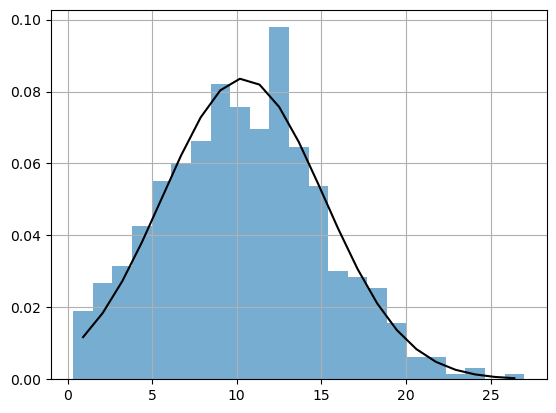

In [171]:
data.loc[~negs_mask, 'wait_time'].hist(bins=23, alpha=0.60, density=True)
plt.plot(bin_centers, pdf, label='PDF', color='k')
plt.show()

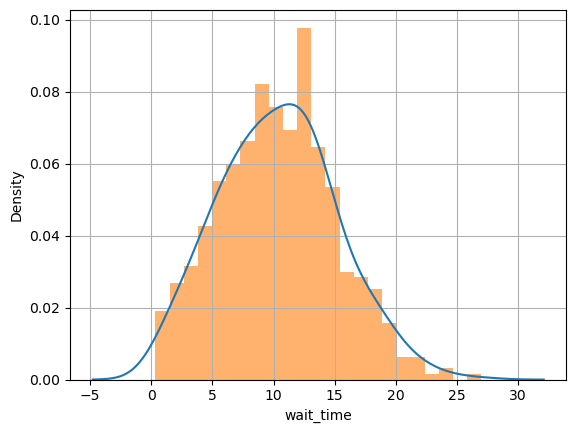

In [123]:

sns.kdeplot(
    data=data.loc[~negs_mask, 'wait_time'],
    bw_adjust=1.26,
)
values, bins, ignored = data.loc[~negs_mask, 'wait_time'].hist(bins=23, alpha=0.60, density=True)
plt.show()

In [42]:
data.loc[~negs_mask, 'wait_time'].describe()

count    547.000000
mean      10.377806
std        4.771044
min        0.340000
25%        6.845000
50%       10.360000
75%       13.420000
max       26.980000
Name: wait_time, dtype: float64

In [63]:
wait_positives = data.loc[~negs_mask, 'wait_time'].value_counts(bins=23).sort_index()
wait_positives

(0.312, 1.498]      12
(1.498, 2.657]      17
(2.657, 3.815]      20
(3.815, 4.973]      27
(4.973, 6.131]      35
(6.131, 7.29]       38
(7.29, 8.448]       42
(8.448, 9.606]      52
(9.606, 10.764]     48
(10.764, 11.923]    44
(11.923, 13.081]    62
(13.081, 14.239]    41
(14.239, 15.397]    34
(15.397, 16.556]    19
(16.556, 17.714]    18
(17.714, 18.872]    16
(18.872, 20.03]     10
(20.03, 21.189]      4
(21.189, 22.347]     4
(22.347, 23.505]     1
(23.505, 24.663]     2
(24.663, 25.822]     0
(25.822, 26.98]      1
Name: wait_time, dtype: int64